## K-近邻算法

### target

- 什么是K近邻分类算法？
- 从文本文件中解析和导入数据
- 使用Matplotlib创建扩散图
- 归一化数值

In [3]:
# 导入数据
from numpy import *
import operator

def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [4]:
group, labels = createDataSet()

### 什么是K-NN：

#### 模型
- 模型主要是通过划分单元（cell）来进行分类
- 模型 = 距离度量 + K值的选择 + 分类决策规则
- 两个实例点的距离是两个实例点相似程度反映的
- K—NN特征空间一般是n维实数向量空间R， 使用的距离是欧式距离，也可以是其他距离

#### K的选择
- K的选择对结果影响显著
- 较小的K，学习的近似误差会减小，但缺点是学习的估计误差会增大（只关心附近的点而导致特征过度细分，从而过拟合）
- 较大的K， 优点是减少学习的估计误差，但是缺点是近似误差增大，这时候不相关特征也会干扰结果的选择，降低预测能力
- 应用中，一般选一个较小的值，然后交叉验证法来选取最优K值

#### 分类决策规则
- K-NN中的分类规则往往是多数表决（应该是0-1分布？我的理解是每个分类都是yes or no）



算法过程：
1.求目标点到样本空间的欧式距离
2.对距离排序
3.选取前K个点
4.输出分类

In [37]:
def classify(inX, dataSet, labels, k):
    """paras:
        inX: 用于分类的输入向量是inX
        dataSet:输入的训练样本集
        labels：标签向量
        K:用于选择最近邻的数目
    """
    # 求欧式距离
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    # 排序
    sortedDistIndicies = distances.argsort()
    # 选取与当前点距离最近的K个点
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [56]:
a = array([4, 2, 1, 3 ])
a.argsort()


array([2, 1, 3, 0])

In [38]:
classify([0,0], group, labels, 3)

'B'

In [7]:
def file2matrix(filename):
    love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector


In [8]:
file = 'datingTestSet.txt'
datingDataMat, datingLabels = file2matrix(file)

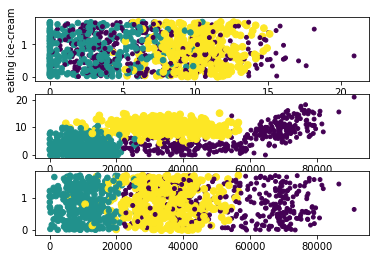

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.subplot(3,1,1)
plt.scatter(datingDataMat[:, 1], datingDataMat[:,2],\
          15.0*array(datingLabels), 15.0*array(datingLabels))
plt.xlabel('play vidio game')
plt.ylabel('eating ice-cream')

plt.subplot(3,1,2)
plt.scatter(datingDataMat[:, 0], datingDataMat[:,1],\
          15.0*array(datingLabels), 15.0*array(datingLabels))

plt.subplot(3,1,3)
plt.scatter(datingDataMat[:, 0], datingDataMat[:,2],\
          15.0*array(datingLabels), 15.0*array(datingLabels))

plt.show()

### 归一化
- 数值本身比较大的columns会对KNN的欧式距离影响比较大，所以，需要对三个特征进行归一化，将所有特征的取值范围控制到0-1之间，这点吴恩达得机器学习里有提到。
- 归一化得方法是：`newValue = (oldValue - min) / (max - min)`

In [18]:
def autoNorm(dataSet):
    
    minValues = dataSet.min(0)
    maxValues = dataSet.max(0)
    ranges = maxValues - minValues
    
    normDataset = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataset = dataSet - tile(minValues, (m,1))
    normDataset = normDataset / tile(ranges,(m, 1))
    return normDataset, ranges, minValues

In [19]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [21]:
normMat, ranges, minValues = autoNorm(datingDataMat)

In [22]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [26]:
normMat.shape

(1000, 3)

In [41]:
def datingClassTest():
    hoRatio = 0.1
    # 读取数据,归一化数据
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minValues = autoNorm(datingDataMat)
    # 创建测试集
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify(normMat[i,:], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        print('the classify came back with: %d, the real answer is: %d'% (classifierResult, datingLabels[i]))
        
        if (classifierResult != datingLabels[i]):
            errorCount += 1
    print('the total error rate is : %f' % (errorCount/float(numTestVecs)))

In [42]:
datingClassTest()

the classify came back with: 3, the real answer is: 3
the classify came back with: 2, the real answer is: 2
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 3, the real answer is: 3
the classify came back with: 3, the real answer is: 3
the classify came back with: 1, the real answer is: 1
the classify came back with: 3, the real answer is: 3
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 2, the real answer is: 2
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with: 1, the real answer is: 1
the classify came back with:

In [48]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input('percentage of time spent playing video games?'))
    ffMiles = float(input('frequent flier miles earned per year？'))
    iceCream = float(input('liters of ice cream consumed per year?'))
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify((inArr-minVals)/(ranges), normMat, datingLabels, 5)
    print('you will probably like this person:', resultList[classifierResult - 1])

In [49]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year？10000
liters of ice cream consumed per year?0.5
you will probably like this person: in small doses


In [63]:
import classify_digit

In [64]:
classify_digit.handwritingClassTest()

TypeError: Required argument 'flags' (pos 2) not found